<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/utilitytableandgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
delta = 0.95
u_H = 73
u_M = 80
burnout_H = 0.015
burnout_M = 0.035
identity_H = 0.0075
identity_M = 0.025
penalty_rate_H = burnout_H + identity_H
penalty_rate_M = burnout_M + identity_M
T = 100
years = np.arange(T)
switch_year = 3  # Optimal switch year based on previous results
switch_cost = 0.225 * u_H  # 22.5% of H utility

# Humanitarian path
utility_H = [u_H - penalty_rate_H * t * u_H for t in years]
discounted_H = [(delta ** t) * u for t, u in zip(years, utility_H)]
cumulative_H = np.cumsum(discounted_H)

# Moneymaker path
utility_M = [u_M - penalty_rate_M * t * u_M for t in years]
discounted_M = [(delta ** t) * u for t, u in zip(years, utility_M)]
cumulative_M = np.cumsum(discounted_M)

# Hybrid path with switch at year 3
utility_hybrid = []
discounted_hybrid = []

for t in years:
    if t < switch_year:
        penalty = penalty_rate_M * t * u_M
        utility = u_M - penalty
    elif t == switch_year:
        penalty = penalty_rate_H * t * u_H
        utility = u_H - penalty - switch_cost
    else:
        penalty = penalty_rate_H * t * u_H
        utility = u_H - penalty
    utility_hybrid.append(utility)
    discounted_hybrid.append((delta ** t) * utility)

cumulative_hybrid = np.cumsum(discounted_hybrid)

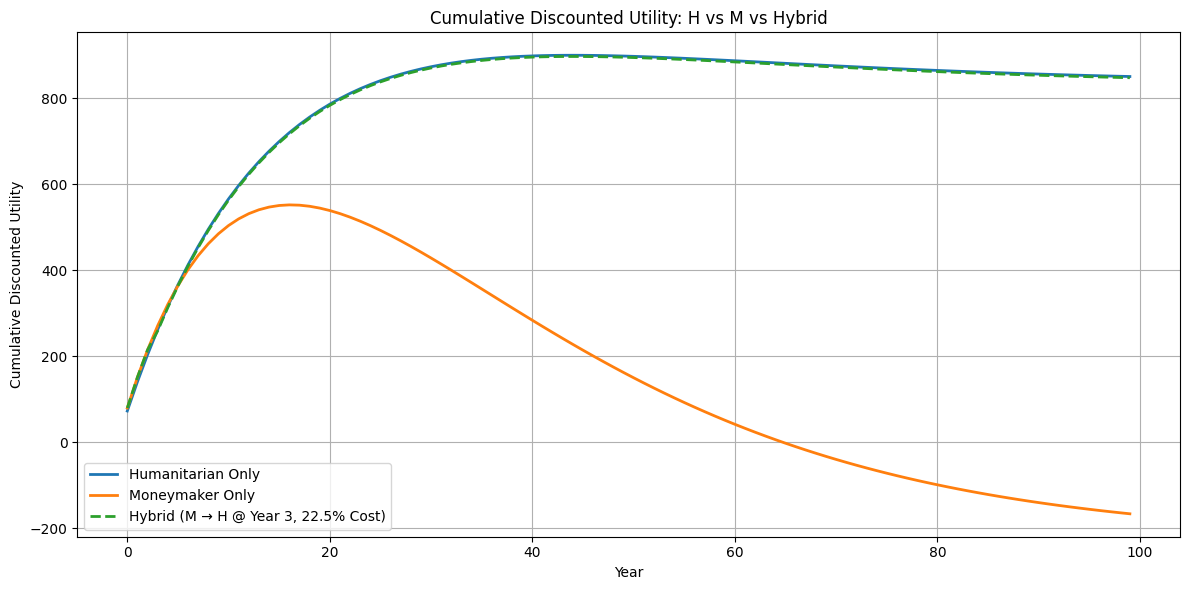

    Year  Utility (H)  Discounted Utility (H)  Cumulative Utility (H)  \
0      0      73.0000               73.000000               73.000000   
1      1      71.3575               67.789625              140.789625   
2      2      69.7150               62.917788              203.707413   
3      3      68.0725               58.363660              262.071072   
4      4      66.4300               54.107650              316.178722   
5      5      64.7875               50.131332              366.310055   
6      6      63.1450               46.417377              412.727432   
7      7      61.5025               42.949490              455.676922   
8      8      59.8600               39.712347              495.389269   
9      9      58.2175               36.691545              532.080814   
10    10      56.5750               33.873542              565.954356   
11    11      54.9325               31.245611              597.199967   
12    12      53.2900               28.795789      

In [2]:
# Plotting cumulative utility
plt.figure(figsize=(12, 6))
plt.plot(years, cumulative_H, label="Humanitarian Only", linewidth=2)
plt.plot(years, cumulative_M, label="Moneymaker Only", linewidth=2)
plt.plot(years, cumulative_hybrid, label=f"Hybrid (M → H @ Year {switch_year}, 22.5% Cost)", linestyle='--', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Cumulative Discounted Utility")
plt.title("Cumulative Discounted Utility: H vs M vs Hybrid")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create DataFrame for comparison
df_comparison = pd.DataFrame({
    "Year": years,
    "Utility (H)": utility_H,
    "Discounted Utility (H)": discounted_H,
    "Cumulative Utility (H)": cumulative_H,
    "Utility (M)": utility_M,
    "Discounted Utility (M)": discounted_M,
    "Cumulative Utility (M)": cumulative_M,
    "Utility (Hybrid)": utility_hybrid,
    "Discounted Utility (Hybrid)": discounted_hybrid,
    "Cumulative Utility (Hybrid)": cumulative_hybrid
})

# Display the first few rows of the table
print(df_comparison.head(15))